<h2>>>Importing required libraries

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import os


In [4]:
import cv2

<h2>>>Processing the data and extraction the labels

In [5]:

label = []
for i in os.listdir(r'D:\Owner\Desktop\ML AND AI DATASETS\trainDogsvsCats'):
    if i[0:3] == 'cat':
        label.append(0)
    elif i[0:3] == 'dog':
        label.append(1)
  


In [6]:
Y = label

<h2>>>Preprocessing the images and choosing appropriate dimensions(Feature)

In [7]:

import numpy as np
import cv2
feature = []
loc = r'D:\Owner\Desktop\ML AND AI DATASETS\trainDogsvsCats'
for i in os.listdir(loc):
    f = cv2.imread(os.path.join(loc,i))
    f = cv2.resize(f,(60,60))
    feature.append(f)

In [8]:

X = np.array(feature)/255
Y = np.array(label)

In [9]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

<h2>>>Defining the  ANN model 

In [10]:

#Step 1 - Define type of model
model = tf.keras.models.Sequential()

In [11]:



#Step 2 : add the rquired layers i.e. input layer, hidden layer , output layer
#input layer
model.add(tf.keras.layers.Flatten())

#hidden layer
model.add(tf.keras.layers.Dense(128,activation='relu'))

#hidden layer
model.add(tf.keras.layers.Dense(128,activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(2,activation='softmax'))


In [12]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

<h2>>>Training the model (epochs=15)

In [13]:

model.fit(xtrain,ytrain,epochs=15)


Epoch 1/15
18750/18750 [==============================] - 18s 958us/step - loss: 0.6812 - acc: 0.5613

<h2>>>Let's Perdict 

In [14]:

ypred = model.predict(xtest)


In [15]:
ypred

array([[ 0.40226039,  0.5977397 ],
       [ 0.85052621,  0.14947379],
       [ 0.53529269,  0.46470731],
       ..., 
       [ 0.3128331 ,  0.68716693],
       [ 0.667171  ,  0.33282897],
       [ 0.35254303,  0.647457  ]], dtype=float32)

In [16]:
ypred.shape

(6250, 2)

In [17]:
xtrain.shape

(18750, 60, 60, 3)

In [18]:
ytrain.shape

(18750,)

In [19]:
xtest.shape

(6250, 60, 60, 3)

In [20]:
ytest.shape

(6250,)

In [21]:

p = []
for i in ypred:
    p.append(np.argmax(i))


In [22]:
p

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [23]:
np.argmax(model.predict(xtest[3].reshape(1,60,60,3)))


0

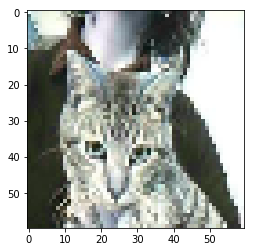

In [24]:

import matplotlib.pyplot as plt
plt.imshow(xtest[3])
plt.show()


<h4>The model accuracy is still on the lower side but then too it is predicting nicely...

In [25]:

testimages = []
loc = r'D:\Owner\Desktop\ML AND AI DATASETS\testDogsvsCats'
for i in os.listdir(loc):
    f = cv2.imread(os.path.join(loc,i))
    f = cv2.resize(f,(60,60))
    testimages.append(f)

In [26]:
np.argmax(model.predict(testimages[1].reshape(1,60,60,3)))

0

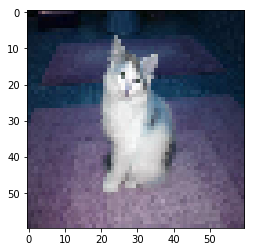

In [27]:
plt.imshow(testimages[1])
plt.show()

<h5>Remember We decided,0->Cat  1->Dog
<h4>The model's prediction was pretty accurate even on pictures, on which the training was not made.The accuracy of model after the completion of 15TH Epoch was just 0.6999 it is very poor accuracy then too it predicted well 
